In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [ ]:
iris = datasets.load_iris()
features = iris.data
labels = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.2, random_state=5)

In [ ]:
# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Initializing parameters
input_dim = X_train.shape[1]
output_dim = len(np.unique(Y_train))
epochs = 100
batch_size = 32
hidden_dim = 8

a)
Train a 2-layered neural network (1 hidden layer) model on the data. Initialize the weights using the He's
method with normal distribution. Make predictions on the test data and
compute the accuracy.

In [ ]:
def create_model(input_dim, hidden_dim, output_dim):
    model = Sequential()
    model.add(Dense(hidden_dim, input_dim=input_dim, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(output_dim, activation='softmax'))
    return model

In [ ]:
model = create_model(input_dim, hidden_dim, output_dim)

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 0.8175 - accuracy: 0.6000
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7921 - accuracy: 0.6083
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7748 - accuracy: 0.6167
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7598 - accuracy: 0.6250
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7464 - accuracy: 0.6333
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7335 - accuracy: 0.6500
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7211 - accuracy: 0.6500
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7096 - accuracy: 0.6500
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6981 - accuracy: 0.6750
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.6833
Epoch 11/100
4/4 [===========

In [ ]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
accuracy = accuracy_score(Y_test, y_pred_classes)
print("Accuracy:", accuracy)

1/1 [==============================] - 0s 51ms/step
Accuracy: 0.8666666666666667


b) Vary the number of neurons in the hidden layer and show the impact on accuracy.

In [ ]:
hidden_neurons_list=[x for x in range(4,33,4)]

accuracies = []

for hidden_dim in hidden_neurons_list:

    model = create_model(input_dim, hidden_dim, output_dim)

    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0)

    y_pred_probs = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(Y_test, y_pred_classes)
    accuracies.append(accuracy)
    print(f"Hidden Neurons: {hidden_dim}, Accuracy: {accuracy}")


1/1 [==============================] - 0s 55ms/step
Hidden Neurons: 4, Accuracy: 0.6333333333333333
1/1 [==============================] - 0s 54ms/step
Hidden Neurons: 8, Accuracy: 0.9
1/1 [==============================] - 0s 57ms/step
Hidden Neurons: 12, Accuracy: 0.8666666666666667
1/1 [==============================] - 0s 55ms/step
Hidden Neurons: 16, Accuracy: 0.8333333333333334
1/1 [==============================] - 0s 75ms/step
Hidden Neurons: 20, Accuracy: 0.8666666666666667
1/1 [==============================] - 0s 54ms/step
Hidden Neurons: 24, Accuracy: 0.8333333333333334
1/1 [==============================] - 0s 54ms/step
Hidden Neurons: 28, Accuracy: 0.8333333333333334
1/1 [==============================] - 0s 58ms/step
Hidden Neurons: 32, Accuracy: 0.8666666666666667


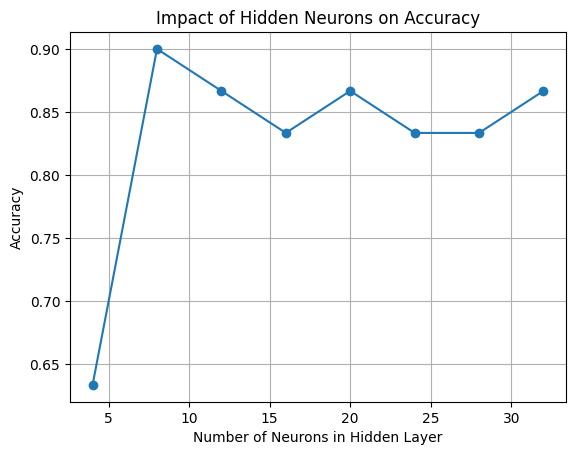

In [ ]:
plt.plot(hidden_neurons_list, accuracies, marker='o')
plt.xlabel('Number of Neurons in Hidden Layer')
plt.ylabel('Accuracy')
plt.title('Impact of Hidden Neurons on Accuracy')
plt.grid()
plt.show()


c)
Take (one of) the case which has best accuracy and employ dropout with
different values of dropout rate (say from 0.1 to 0.7). Plot the
variation of accuracy versus dropout rate.


In [ ]:
best_hidden_dim = 8
dropout_rates = np.arange(0.1, 0.8, 0.1)
accuracies = []

for dropout_rate in dropout_rates:
    model = Sequential()
    model.add(Dense(best_hidden_dim, input_dim=input_dim, activation='relu', kernel_initializer='he_normal'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(output_dim, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

    model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0)

    y_pred_probs = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(Y_test, y_pred_classes)
    accuracies.append(accuracy)
    print(f"Dropout Rate: {dropout_rate}, Accuracy: {accuracy}")


1/1 [==============================] - 0s 59ms/step
Dropout Rate: 0.1, Accuracy: 0.8333333333333334
1/1 [==============================] - 0s 52ms/step
Dropout Rate: 0.2, Accuracy: 0.8
1/1 [==============================] - 0s 54ms/step
Dropout Rate: 0.30000000000000004, Accuracy: 0.9
1/1 [==============================] - 0s 78ms/step
Dropout Rate: 0.4, Accuracy: 0.9333333333333333
1/1 [==============================] - 0s 69ms/step
Dropout Rate: 0.5, Accuracy: 0.7
1/1 [==============================] - 0s 56ms/step
Dropout Rate: 0.6, Accuracy: 0.7333333333333333
1/1 [==============================] - 0s 58ms/step
Dropout Rate: 0.7000000000000001, Accuracy: 0.8666666666666667


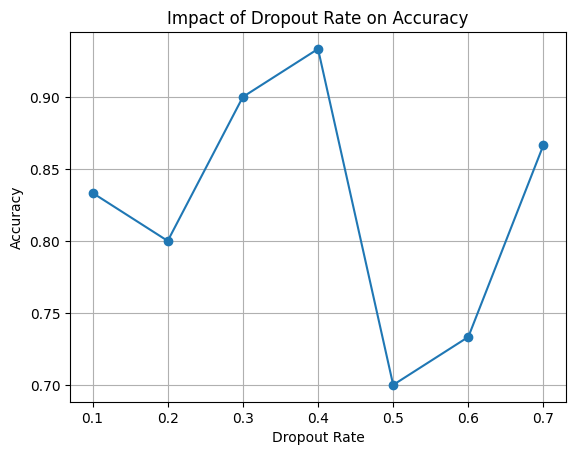

In [ ]:
plt.plot(dropout_rates, accuracies, marker='o')
plt.xlabel('Dropout Rate')
plt.ylabel('Accuracy')
plt.title('Impact of Dropout Rate on Accuracy')
plt.grid()
plt.show()


d) Now increase the
number of hidden layers (with same no. of neurons) and show the
variation of accuracy with respect to the number of hidden layers. You
can select the number of neurons as determined best in part b)

In [ ]:
hidden_layers_list = [1, 2, 3, 4, 5]
accuracies = []
num_neurons = 16

for num_hidden_layers in hidden_layers_list:
    model = Sequential()
    model.add(Dense(num_neurons, input_dim=input_dim, activation='relu', kernel_initializer='he_normal'))
    for k in range(num_hidden_layers):
        model.add(Dense(num_neurons, activation='relu', kernel_initializer='he_normal'))

    model.add(Dense(output_dim, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0)

    y_pred_probs = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred_probs, axis=1)

    accuracy = accuracy_score(Y_test, y_pred_classes)
    accuracies.append(accuracy)
    print(f"Hidden Layers: {num_hidden_layers}, Accuracy: {accuracy}")

1/1 [==============================] - 0s 59ms/step
Hidden Layers: 1, Accuracy: 0.8666666666666667
1/1 [==============================] - 0s 70ms/step
Hidden Layers: 2, Accuracy: 0.9333333333333333
1/1 [==============================] - 0s 70ms/step
Hidden Layers: 3, Accuracy: 0.9333333333333333
1/1 [==============================] - 0s 124ms/step
Hidden Layers: 4, Accuracy: 0.9
1/1 [==============================] - 0s 88ms/step
Hidden Layers: 5, Accuracy: 0.9


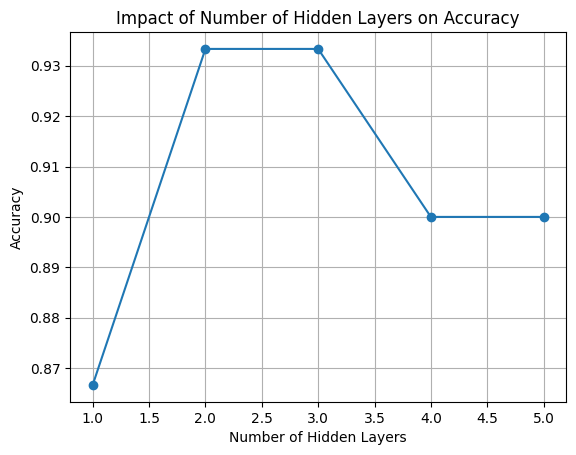

In [ ]:
# Plot accuracy versus number of hidden layers
plt.plot(hidden_layers_list, accuracies, marker='o')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Impact of Number of Hidden Layers on Accuracy')
plt.grid()
plt.show()


e) Using the setting as determined best in part b), train the model with a
few different optimization algorithms (with default settings) and print
the accuracy from each case. You may try adam, adagrad, adadelta.

In [ ]:
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta

num_neurons = 8

optimizers = [Adagrad(), Adadelta(), Adam()]

In [ ]:
model = create_model(input_dim, hidden_dim, output_dim)

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0)

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(Y_test, y_pred_classes)
accuracies.append(accuracy)
print(f"Optimizer: Adam, Accuracy: {accuracy}")

1/1 [==============================] - 0s 50ms/step
Optimizer: Adam, Accuracy: 0.9


In [ ]:
model = create_model(input_dim, hidden_dim, output_dim)

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adagrad(), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0)

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(Y_test, y_pred_classes)
accuracies.append(accuracy)
print(f"Optimizer: Adagrad, Accuracy: {accuracy}")

1/1 [==============================] - 0s 64ms/step
Optimizer: Adagrad, Accuracy: 0.7333333333333333


In [ ]:
model = create_model(input_dim, hidden_dim, output_dim)

model.compile(loss='sparse_categorical_crossentropy', optimizer=Adadelta(), metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0)

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

accuracy = accuracy_score(Y_test, y_pred_classes)
accuracies.append(accuracy)
print(f"Hidden Neurons: adadelta, Accuracy: {accuracy}")

1/1 [==============================] - 0s 83ms/step
Hidden Neurons: adadelta, Accuracy: 0.5666666666666667
